# Suicide Death Rate

![sucide.jpeg](sucide.jpeg)


Suicide is a significant public health issue in the United States, affecting individuals across various age groups, genders, races, and ethnicities. It is a leading cause of death, with rates that have fluctuated over the years in response to complex factors, including mental health issues, socioeconomic challenges, and access to support resources. Suicide rates tend to vary substantially across demographic groups; for instance, men generally have higher suicide rates than women, and certain racial and age groups show increased vulnerability. Understanding these patterns is crucial for developing targeted prevention strategies and mental health resources.

In this project, we analyze U.S. suicide rates by examining demographic variables such as sex, race, Hispanic origin, and age group over a historical timeline. This analysis aims to uncover trends, identify high-risk populations, and provide insights into how suicide affects diverse communities across the nation. Through Python-based data exploration and visualization, this project seeks to contribute to a broader understanding of suicide in the U.S., helping inform policies and interventions to reduce these tragic incidents.

The project is divided into several phases:
Data Import and Cleaning Exploratory Data Analysis (EDA) Feature Engineering Predictive Modeling. The data is sourced from the United State of America Data Gov website.

# Data Importing and Inspection

In [66]:
!pip install geopandas
!pip install folium
import pandas as pd                # Data manipulation and analysis
import matplotlib.pyplot as plt     # Basic plotting
import seaborn as sns               # Advanced statistical visualizations
from scipy import stats             # Statistical analysis

# Optional libraries for more advanced analysis
import statsmodels.api as sm        # Advanced statistical modeling
from sklearn.model_selection import train_test_split  # Data splitting for ML
from sklearn.linear_model import LinearRegression     # Regression analysis
from sklearn.cluster import KMeans                    # Clustering analysis
import geopandas as gpd             # Geospatial analysis (if needed)
import folium                       # Interactive maps (if needed)


In [67]:
# Load the CSV file
sucide = pd.read_csv('sucide.csv')
sucide

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [68]:
sucide.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [69]:
# summary information about columns, data types, and missing values
sucide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


In [70]:
# Check for basic statistics for numerical columns
sucide.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,5484.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,13.709810
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.531805
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,10.500000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,19.500000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


In [71]:
# Check for missing values
missing_values = sucide.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64


In [78]:
# Check for duplicates
duplicates = sucide.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
sucide.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [80]:
# Rename columns for consistency and ease of use
sucide.columns = [col.lower().replace(' ', '_') for col in sucide.columns]
sucide

,indicator,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate,flag
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [82]:
# Convert 'year' column to integer if necessary
sucide['year'] = sucide['year'].astype(int)

# Convert certain columns to category type
sucide['stub_name'] = sucide['stub_name'].astype('category')
sucide['age'] = sucide['age'].astype('category')


In [84]:
# Check unique values in categorical columns
"Unique values in 'stub_name':", sucide['stub_name'].unique()
"Unique values in 'age':", sucide['age'].unique()

("Unique values in 'age':",
 ['All ages', '10-14 years', '15-24 years', '15-19 years', '20-24 years', ..., '55-64 years', '65 years and over', '65-74 years', '75-84 years', '85 years and over']
 Length: 15
 Categories (15, object): ['10-14 years', '15-19 years', '15-24 years', '20-24 years', ..., '65-74 years', '75-84 years', '85 years and over', 'All ages'])

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the initial step in examining and visualizing data to discover patterns, identify anomalies, test hypotheses, and check assumptions. For our dataset on suicide rates in the U.S. by sex, race, Hispanic origin, and age, here are some EDA steps we can perform, along with explanations of what we’re trying to find with each code snippet

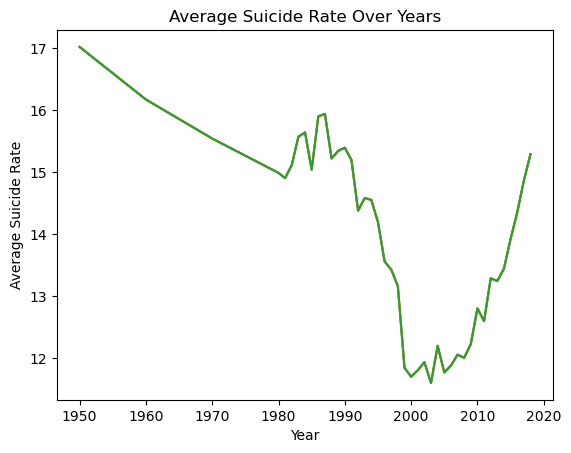

In [90]:
# Group by year and calculate the average suicide rate
year_avg = sucide.groupby('year')['estimate'].mean()

# Plot the average suicide rate over the years
year_avg.plot(kind='line', title='Average Suicide Rate Over Years', ylabel='Average Suicide Rate', xlabel='Year')
plt.show()

There’s an upward or downward trend, giving insight into long-term changes in suicide rates across all demographics since 1950 to 2020.

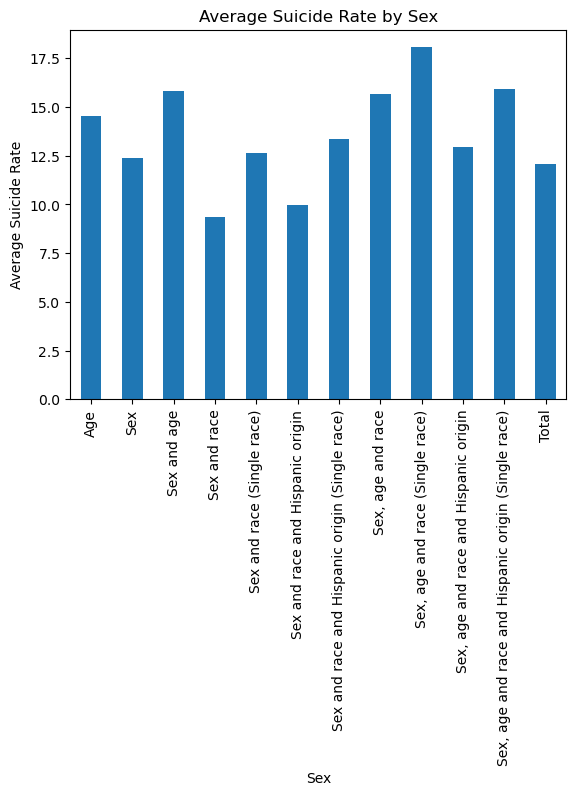

In [165]:
# Group by sex and calculate the mean suicide rate
sex_avg = sucide.groupby('stub_name', observed=False)['estimate'].mean()

# Plot the suicide rates by sex
sex_avg.plot(kind='bar', title='Average Suicide Rate by Sex', ylabel='Average Suicide Rate', xlabel='Sex')
plt.show()


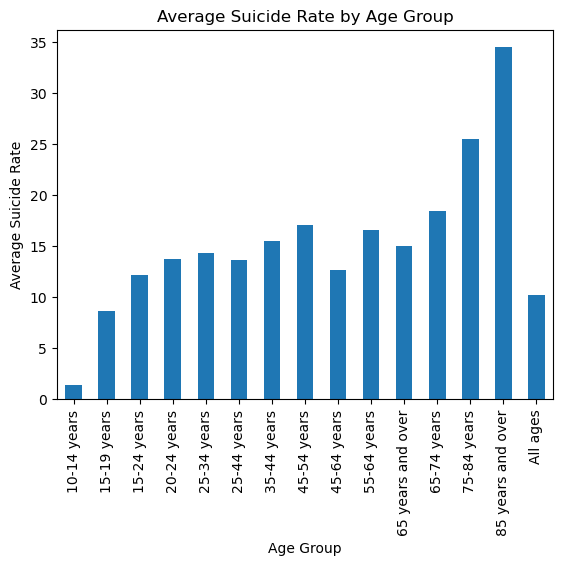

In [167]:
# Group by age and calculate the mean suicide rate
age_avg = sucide.groupby('age', observed=False)['estimate'].mean()

# Plot suicide rates by age group
age_avg.plot(kind='bar', title='Average Suicide Rate by Age Group', ylabel='Average Suicide Rate', xlabel='Age Group')
plt.show()

By grouping data by age and calculating the average suicide rate for each age group, we can identify which age groups have the highest and lowest rates. This helps pinpoint high-risk age groups, which can guide targeted prevention strategies.

In [117]:
# Convert age to numeric values if it's categorical (requires a numeric scale)
sucide['age_num'] = pd.to_numeric(sucide['age_num'], errors='coerce')

# Calculate correlation between age_num and suicide rate
age_correlation = sucide[['age_num', 'estimate']].corr().iloc[0, 1]
print("Correlation between age and suicide rate:", age_correlation)

Correlation between age and suicide rate: 0.32569327018217703


While there is a slight upward trend in suicide rates with age, the weak correlation suggests that simply looking at age does not provide a complete picture. Age may contribute to suicide risk, but it’s likely one of several factors that influence rates across different groups.

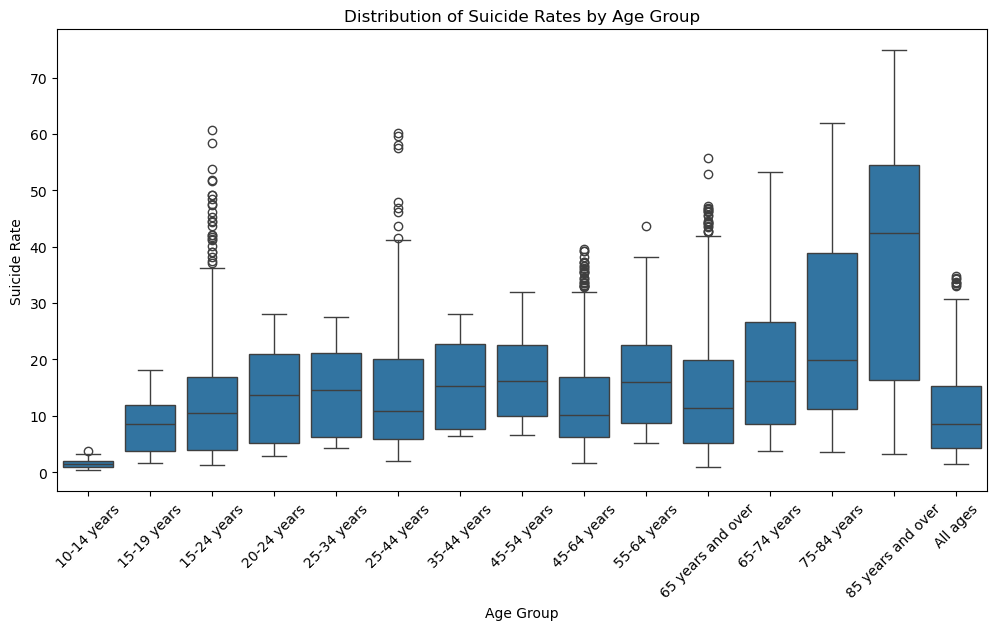

In [128]:
import seaborn as sns

# Box plot of suicide rates by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='estimate', data=sucide)
plt.title("Distribution of Suicide Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suicide Rate")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



A box plot is useful for visualizing the spread and variability of suicide rates within each age group. This can help identify if certain age groups have more consistent or more widely varying suicide rates

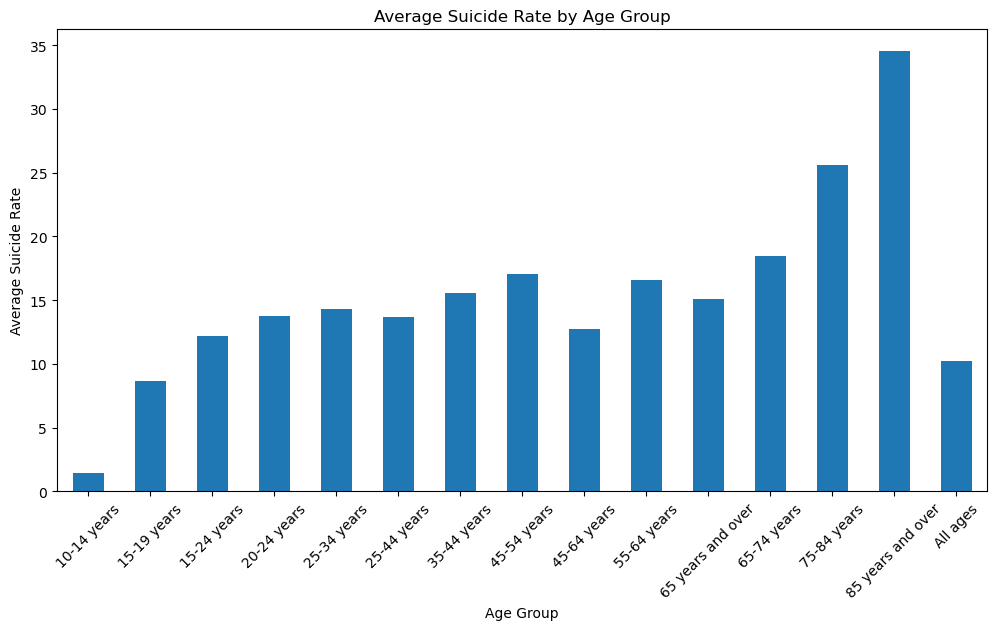

In [169]:
# Group by age and calculate the mean suicide rate across all years
age_avg = sucide.groupby('age', observed=False)['estimate'].mean()

# Plot the average suicide rate by age group
plt.figure(figsize=(12, 6))
age_avg.plot(kind='bar', title='Average Suicide Rate by Age Group', ylabel='Average Suicide Rate', xlabel='Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


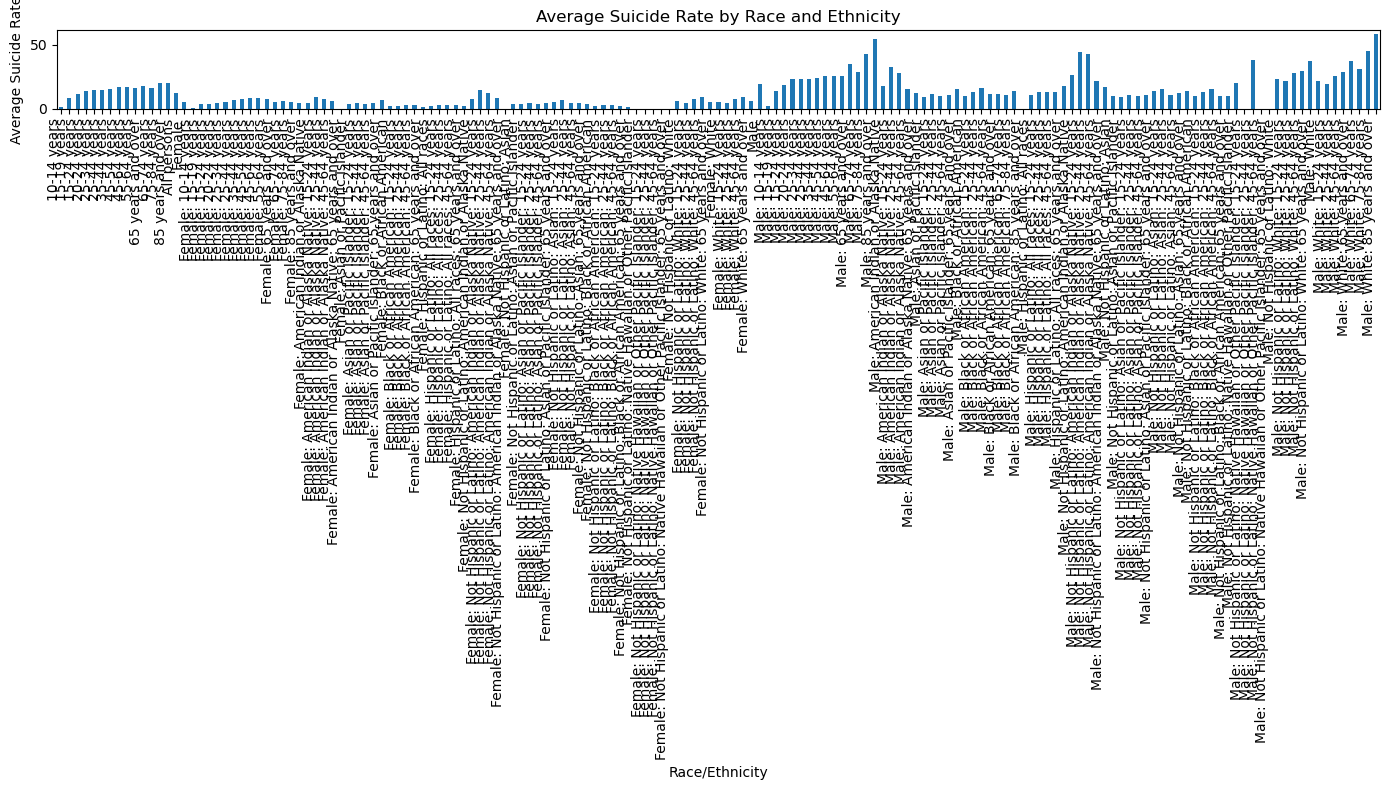

In [163]:
# Group by race/ethnicity (assuming race/ethnicity is represented in 'stub_label') and calculate the mean suicide rate
race_avg = sucide.groupby('stub_label')['estimate'].mean()

# Plot the average suicide rate by race/ethnicity with an increased figure size and rotated labels
plt.figure(figsize=(14, 8))
race_avg.plot(kind='bar', title='Average Suicide Rate by Race and Ethnicity', ylabel='Average Suicide Rate', xlabel='Race/Ethnicity')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability and align to the right
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


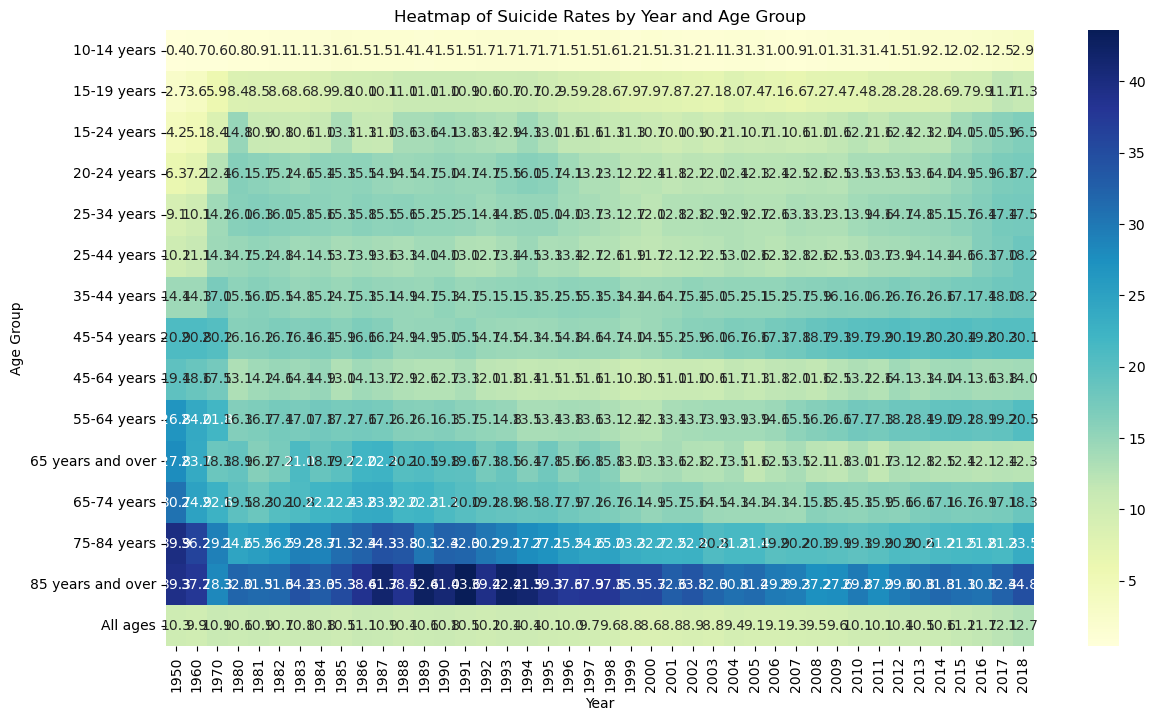

In [171]:
# Pivot data to create a matrix for heatmap
age_year_matrix = sucide.pivot_table(values='estimate', index='age', columns='year', aggfunc='mean', observed=False)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(age_year_matrix, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Heatmap of Suicide Rates by Year and Age Group")
plt.xlabel("Year")
plt.ylabel("Age Group")
plt.show()


The heatmap provides a color-coded view of suicide rates across age groups and years, making it easy to spot high or low values and trends over time for each age group. This can visually highlight periods and groups with significant rate changes.

These EDAs cover broader perspectives on the dataset and avoid relying on specific labels like "Male" or "Female." Each analysis provides insight into different aspects of the data, from trends over time to variations by age group and race/ethnicity.

<Figure size 1200x800 with 0 Axes>

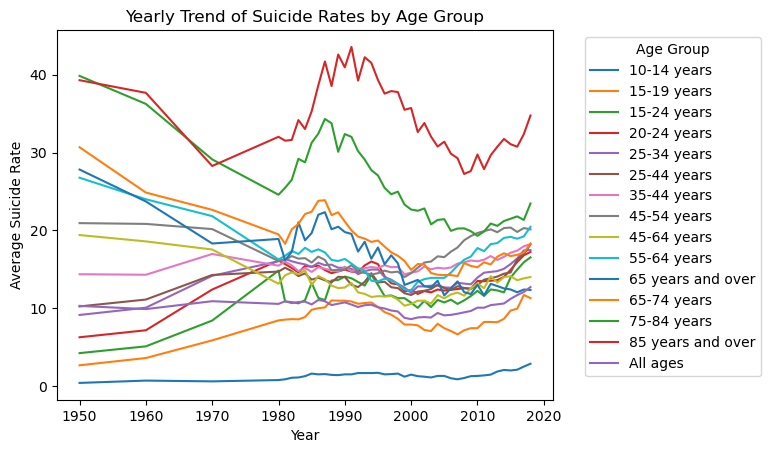

In [191]:
# Group data by both year and age, then calculate the average suicide rate
age_yearly_trend = sucide.groupby(['year', 'age' ], observed=False)['estimate'].mean().unstack()

# Plot the trend for each age group over the years
plt.figure(figsize=(12, 8))
age_yearly_trend.plot(title='Yearly Trend of Suicide Rates by Age Group')
plt.ylabel('Average Suicide Rate')
plt.xlabel('Year')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This line plot shows the yearly trend in suicide rates for each age group. Observing these trends can help identify if particular age groups are experiencing rising or falling rates over time, highlighting potential shifts in risk across ages